# connect drive

In [ ]:
# Install necessary libraries
!pip install mne numpy pandas

import mne
import numpy as np
import pandas as pd
from google.colab import files

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.3 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/TA


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/TA


# import file edf

In [ ]:
import mne
import pandas as pd

# File EDF
file1 = "/content/drive/MyDrive/TA/EDF/chb05_13.edf"

# Membaca file EDF
data1 = mne.io.read_raw_edf(file1, preload=True)  # Preload digunakan agar data dibaca ke dalam memori
data1

# Mendapatkan data dan informasi dari file EDF
data, times = data1.get_data(return_times=True)  # Mengambil data EEG dan waktu
channel_names = data1.ch_names  # Mendapatkan nama channel

# Membuat DataFrame dengan data EEG dan waktu
df = pd.DataFrame(data.T, columns=channel_names)  # Transpose data sehingga sesuai dengan format DataFrame
df['Time'] = times  # Menambahkan kolom waktu




Extracting EDF parameters from /content/drive/MyDrive/TA/chb05/chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


<ipython-input-24-d95984e1c1fd>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  data1 = mne.io.read_raw_edf(file1, preload=True)  # Preload digunakan agar data dibaca ke dalam memori


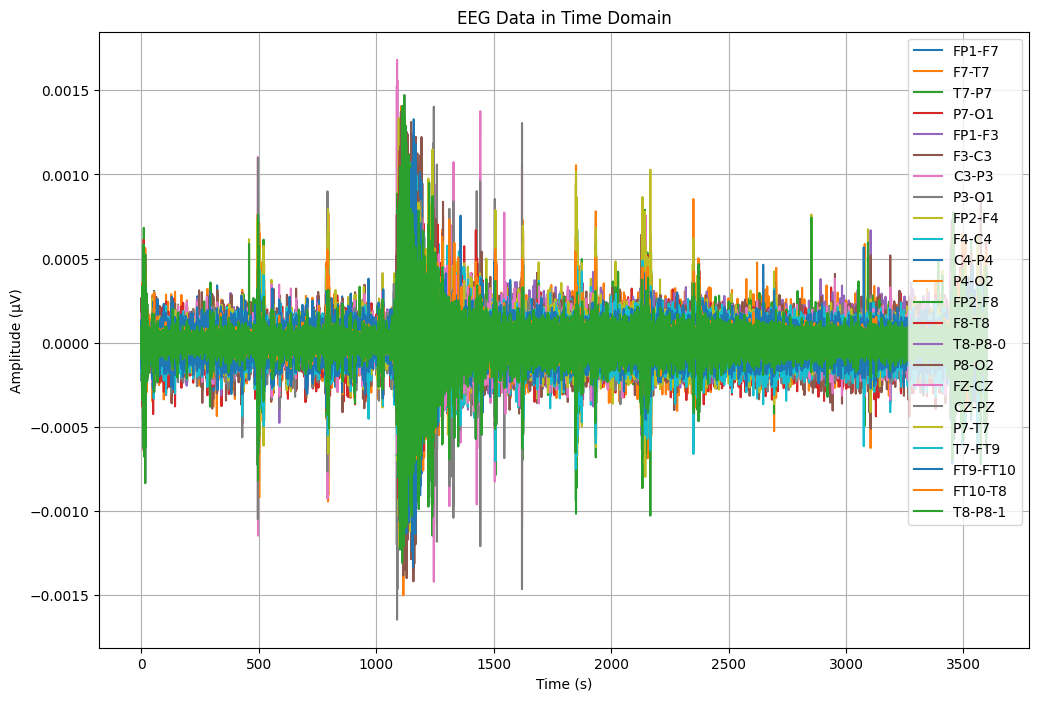

In [ ]:
#plot dari data edf
import matplotlib.pyplot as plt

# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = df['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, df[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()

In [ ]:
# Menyimpan ke file CSV
csv_file = "/content/drive/MyDrive/TA/CSV/convert_chb05_13.csv"
df.to_csv(csv_file, index=False)

print(f"Data berhasil disimpan dalam file CSV: {csv_file}")

Data berhasil disimpan dalam file CSV: /content/drive/MyDrive/TA/CSV/convert_chb05_13.csv


# import file csv

In [ ]:
file1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/convert_chb05_13.csv")
file1

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,-7.228327e-06,-3.965812e-05,-5.333333e-05,-4.942613e-05,1.013919e-04,-1.631258e-04,-7.833944e-05,-9.572650e-06,6.505495e-05,-4.395604e-05,...,-5.294261e-05,2.910867e-05,-1.334310e-04,-6.700855e-05,5.372405e-05,-5.958486e-05,-8.849817e-05,3.614164e-05,-5.294261e-05,0.000000
1,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.003906
2,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.007812
3,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,5.860806e-07,1.758242e-06,-9.768010e-07,1.953602e-07,1.953602e-07,...,1.953602e-07,1.953602e-07,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,0.011719
4,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,...,5.860806e-07,1.953602e-07,1.953602e-07,1.953602e-07,1.953602e-07,-1.953602e-07,1.953602e-07,5.860806e-07,5.860806e-07,0.015625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921595,-6.661783e-05,6.192918e-05,-7.599512e-05,5.294261e-05,-4.395604e-05,9.572650e-06,3.321123e-06,3.711844e-06,-7.794872e-05,1.758242e-06,...,4.708181e-05,3.145299e-05,6.349206e-05,-4.043956e-05,7.638584e-05,-3.965812e-05,9.768010e-07,-3.536020e-05,4.708181e-05,3599.980469
921596,-6.935287e-05,7.638584e-05,-1.314774e-04,9.162393e-05,-5.020757e-05,4.493284e-06,7.619048e-06,5.665446e-06,-7.794872e-05,-2.539683e-06,...,1.973138e-05,3.028083e-05,6.349206e-05,-3.965812e-05,1.318681e-04,-4.200244e-05,2.148962e-06,-2.246642e-05,1.973138e-05,3599.984375
921597,-7.443223e-05,-4.884005e-06,-8.771673e-05,1.349939e-04,-5.606838e-05,1.953602e-07,9.181929e-06,1.387057e-05,-7.404151e-05,-5.665446e-06,...,5.333333e-05,3.809524e-05,6.153846e-05,-3.496947e-05,8.810745e-05,2.910867e-05,5.274725e-06,-5.411477e-05,5.333333e-05,3599.988281
921598,-7.169719e-05,-2.090354e-05,-7.619048e-06,6.818071e-05,-5.411477e-05,1.367521e-06,1.308913e-05,6.056166e-06,-6.935287e-05,-2.539683e-06,...,5.255189e-05,5.333333e-05,5.919414e-05,-3.848596e-05,8.009768e-06,3.575092e-05,-1.953602e-07,-5.411477e-05,5.255189e-05,3599.992188


In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk mendapatkan frekuensi terbesar dari FFT
def get_max_frequency(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]

    max_freq_index = np.argmax(fft_vals)
    return fft_freqs[max_freq_index], fft_vals[max_freq_index]

# Fungsi untuk mendeteksi waktu ketika magnitudo maksimum terjadi
def get_time_of_max_magnitude(channel, max_magnitude, data, time_column):
    # Cari baris di mana magnitudo terbesar muncul di data asli
    channel_signal = data[channel].values
    max_index = np.argmax(np.abs(channel_signal))  # Index dengan nilai maksimum
    time_of_max = data[time_column].iloc[max_index]  # Waktu saat magnitudo maksimum
    return time_of_max

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Memuat data
data1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/convert_chb05_13.csv")

# Pilih saluran EEG yang akan dianalisis
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat dictionary untuk menyimpan hasil
max_frequencies = {}

# Loop untuk menghitung frekuensi terbesar dan waktu magnitudo terbesar untuk setiap saluran
for channel in channels:
    signal = data1[channel].values  # Ambil sinyal dari setiap saluran EEG
    max_freq, max_magnitude = get_max_frequency(signal, sampling_rate)  # Dapatkan frekuensi dan magnitudo terbesar

    # Mendapatkan waktu ketika magnitudo terbesar terjadi
    time_of_max = get_time_of_max_magnitude(channel, max_magnitude, data1, 'Time')

    # Menyimpan hasil ke dictionary
    max_frequencies[channel] = {
        'Max Frequency (Hz)': max_freq,
        'Max Magnitude': max_magnitude,
        'Time of Max Magnitude (s)': time_of_max
    }

# Menampilkan hasil saluran dengan frekuensi terbesar dan waktu magnitudo maksimum
sorted_max_freq = sorted(max_frequencies.items(), key=lambda x: x[1]['Max Magnitude'], reverse=True)

# Menampilkan hasil akhir
print("Saluran EEG dengan frekuensi terbesar dan waktu terjadinya magnitudo maksimum:")
for channel, info in sorted_max_freq:
    print(f"Channel: {channel}, Max Frequency: {info['Max Frequency (Hz)']:.2f} Hz, "
          f"Magnitude: {info['Max Magnitude']:.6f}, Time: {info['Time of Max Magnitude (s)']:.6f} s")


Saluran EEG dengan frekuensi terbesar dan waktu terjadinya magnitudo maksimum:
Channel: F3-C3, Max Frequency: 1.19 Hz, Magnitude: 1.761195, Time: 1148.261719 s
Channel: F7-T7, Max Frequency: 0.90 Hz, Magnitude: 1.569781, Time: 1193.691406 s
Channel: FP1-F3, Max Frequency: 1.78 Hz, Magnitude: 1.488424, Time: 1165.964844 s
Channel: F4-C4, Max Frequency: 1.94 Hz, Magnitude: 1.361550, Time: 1122.894531 s
Channel: FT9-FT10, Max Frequency: 1.47 Hz, Magnitude: 1.361519, Time: 1156.460938 s
Channel: P7-O1, Max Frequency: 1.93 Hz, Magnitude: 1.329667, Time: 1139.246094 s
Channel: FZ-CZ, Max Frequency: 1.25 Hz, Magnitude: 1.316148, Time: 1122.058594 s
Channel: P3-O1, Max Frequency: 0.97 Hz, Magnitude: 1.297437, Time: 1088.500000 s
Channel: FP2-F4, Max Frequency: 1.67 Hz, Magnitude: 1.208834, Time: 1095.398438 s
Channel: T7-P7, Max Frequency: 1.25 Hz, Magnitude: 1.205981, Time: 1239.550781 s
Channel: P7-T7, Max Frequency: 1.25 Hz, Magnitude: 1.205981, Time: 1239.550781 s
Channel: T7-FT9, Max Freq

In [ ]:
import numpy as np
import pandas as pd

# Fungsi untuk mendapatkan frekuensi terbesar dari FFT
def get_max_frequency(signal, sampling_rate):
    N = len(signal)
    T = 1.0 / sampling_rate
    fft_vals = np.fft.fft(signal)
    fft_freqs = np.fft.fftfreq(N, T)
    fft_vals = np.abs(fft_vals[:N // 2])
    fft_freqs = fft_freqs[:N // 2]

    max_freq_index = np.argmax(fft_vals)
    return fft_freqs[max_freq_index], fft_vals[max_freq_index]

# Fungsi untuk mendeteksi waktu ketika magnitudo maksimum terjadi
def get_time_of_max_magnitude(channel, max_magnitude, data, time_column):
    # Cari baris di mana magnitudo terbesar muncul di data asli
    channel_signal = data[channel].values
    max_index = np.argmax(np.abs(channel_signal))  # Index dengan nilai maksimum
    time_of_max = data[time_column].iloc[max_index]  # Waktu saat magnitudo maksimum
    return time_of_max

# Sampling rate
sampling_rate = 256  # Misal 256 Hz

# Memuat data
data1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/convert_chb05_13.csv")

# Pilih saluran EEG yang akan dianalisis
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3', 'C3-P3', 'P3-O1',
            'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8', 'T8-P8-0', 'P8-O2',
            'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Membuat dictionary untuk menyimpan hasil
max_frequencies = {}

# Loop untuk menghitung frekuensi terbesar dan waktu magnitudo terbesar untuk setiap saluran
for channel in channels:
    signal = data1[channel].values  # Ambil sinyal dari setiap saluran EEG
    max_freq, max_magnitude = get_max_frequency(signal, sampling_rate)  # Dapatkan frekuensi dan magnitudo terbesar

    # Mendapatkan waktu ketika magnitudo terbesar terjadi
    time_of_max = get_time_of_max_magnitude(channel, max_magnitude, data1, 'Time')

    # Menyimpan hasil ke dictionary
    max_frequencies[channel] = {
        'Max Frequency (Hz)': max_freq,
        'Max Magnitude': max_magnitude,
        'Time of Max Magnitude (s)': time_of_max
    }

# Mengurutkan hasil berdasarkan waktu dari yang tercepat hingga yang terlama
sorted_by_time = sorted(max_frequencies.items(), key=lambda x: x[1]['Time of Max Magnitude (s)'])

# Menampilkan hasil akhir
print("Saluran EEG dengan frekuensi terbesar dan waktu terjadinya magnitudo maksimum (diurutkan berdasarkan waktu):")
for channel, info in sorted_by_time:
    print(f"Channel: {channel}, Max Frequency: {info['Max Frequency (Hz)']:.2f} Hz, "
          f"Magnitude: {info['Max Magnitude']:.6f}, Time: {info['Time of Max Magnitude (s)']:.6f} s")


Saluran EEG dengan frekuensi terbesar dan waktu terjadinya magnitudo maksimum (diurutkan berdasarkan waktu):
Channel: C3-P3, Max Frequency: 1.42 Hz, Magnitude: 1.003392, Time: 1088.500000 s
Channel: P3-O1, Max Frequency: 0.97 Hz, Magnitude: 1.297437, Time: 1088.500000 s
Channel: FP2-F4, Max Frequency: 1.67 Hz, Magnitude: 1.208834, Time: 1095.398438 s
Channel: P4-O2, Max Frequency: 1.42 Hz, Magnitude: 1.119024, Time: 1115.199219 s
Channel: T8-P8-0, Max Frequency: 0.98 Hz, Magnitude: 0.975898, Time: 1119.421875 s
Channel: T8-P8-1, Max Frequency: 0.98 Hz, Magnitude: 0.975898, Time: 1119.421875 s
Channel: FZ-CZ, Max Frequency: 1.25 Hz, Magnitude: 1.316148, Time: 1122.058594 s
Channel: F4-C4, Max Frequency: 1.94 Hz, Magnitude: 1.361550, Time: 1122.894531 s
Channel: F8-T8, Max Frequency: 1.38 Hz, Magnitude: 1.084825, Time: 1123.195312 s
Channel: FT10-T8, Max Frequency: 1.15 Hz, Magnitude: 0.770020, Time: 1123.199219 s
Channel: P7-O1, Max Frequency: 1.93 Hz, Magnitude: 1.329667, Time: 1139.24

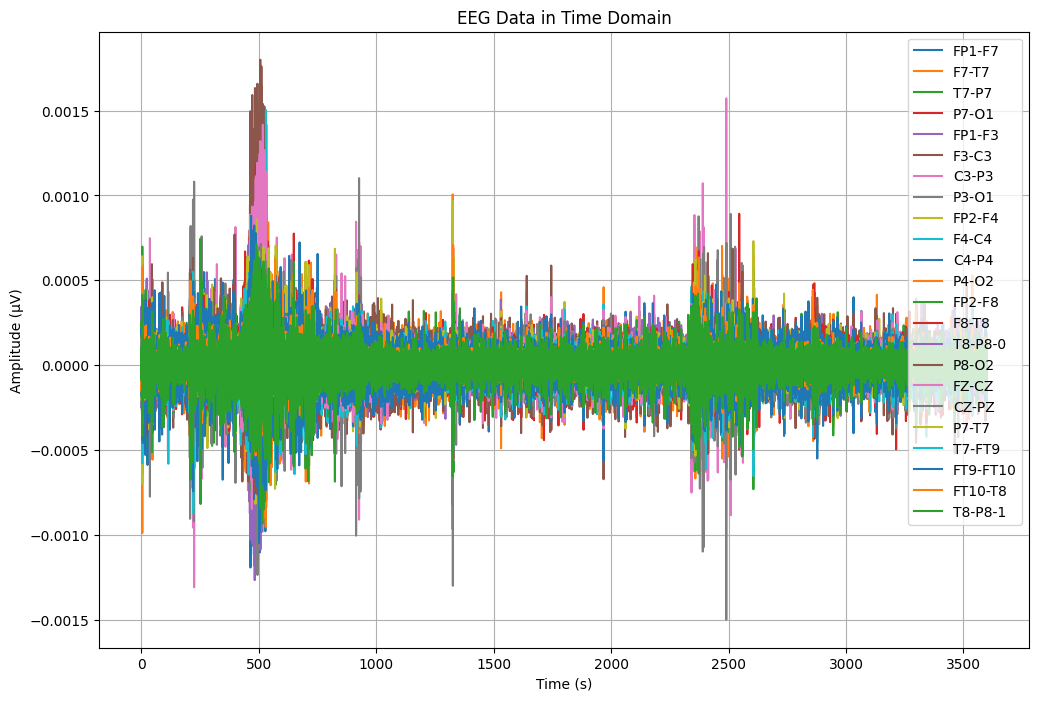

In [ ]:
import matplotlib.pyplot as plt

# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']  # Anda bisa memilih saluran lainnya
time = file1['Time']  # Kolom waktu

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran
for channel in channels:
    plt.plot(time, file1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


In [ ]:
file1.shape

(921600, 24)

In [ ]:
file1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921600 entries, 0 to 921599
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   FP1-F7    921600 non-null  float64
 1   F7-T7     921600 non-null  float64
 2   T7-P7     921600 non-null  float64
 3   P7-O1     921600 non-null  float64
 4   FP1-F3    921600 non-null  float64
 5   F3-C3     921600 non-null  float64
 6   C3-P3     921600 non-null  float64
 7   P3-O1     921600 non-null  float64
 8   FP2-F4    921600 non-null  float64
 9   F4-C4     921600 non-null  float64
 10  C4-P4     921600 non-null  float64
 11  P4-O2     921600 non-null  float64
 12  FP2-F8    921600 non-null  float64
 13  F8-T8     921600 non-null  float64
 14  T8-P8-0   921600 non-null  float64
 15  P8-O2     921600 non-null  float64
 16  FZ-CZ     921600 non-null  float64
 17  CZ-PZ     921600 non-null  float64
 18  P7-T7     921600 non-null  float64
 19  T7-FT9    921600 non-null  float64
 20  FT9-

In [ ]:
import pandas as pd

# Membaca data EEG (sesuaikan path dengan lokasi file Anda)
df = pd.read_csv('/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv')

# Mengelompokkan data berdasarkan waktu (pembulatan ke detik terdekat)
df['Time_rounded'] = df['Time'].round()

# Menghitung variansi pada setiap detik untuk setiap channel (kolom selain 'Time' dan 'Time_rounded')
var_per_second = df.groupby('Time_rounded').var()

# Menampilkan hasil variansi per detik
print(var_per_second)


                    FP1-F7         F7-T7         T7-P7         P7-O1  \
Time_rounded                                                           
0.0           3.924882e-09  6.324027e-09  2.172638e-09  9.986296e-10   
1.0           4.644413e-09  4.372927e-09  3.122580e-09  2.963976e-09   
2.0           3.651719e-09  7.391180e-09  5.157663e-09  1.505831e-09   
3.0           8.281022e-09  1.499148e-08  1.792380e-08  4.000843e-09   
4.0           2.031213e-08  5.771706e-08  2.560589e-08  3.329031e-09   
...                    ...           ...           ...           ...   
3596.0        7.469978e-10  3.223313e-09  5.689116e-09  4.225952e-09   
3597.0        1.637974e-09  8.803312e-10  7.719333e-10  1.664664e-09   
3598.0        2.608569e-09  2.753913e-09  1.995095e-09  3.730127e-09   
3599.0        1.019702e-09  3.197940e-09  1.644095e-09  1.803333e-09   
3600.0        1.918195e-09  4.620496e-09  2.099766e-09  8.100986e-09   

                    FP1-F3         F3-C3         C3-P3         

In [ ]:
import pandas as pd

# Menghitung mean dan standar deviasi dari setiap kolom
mean_var = df.mean()
std_var = df.std()

# Menghitung threshold (mean + 2 * std)
threshold = mean_var + 2 * std_var

# Menampilkan threshold untuk setiap channel
print(threshold)


FP1-F7             0.000157
F7-T7              0.000181
T7-P7              0.000118
P7-O1              0.000139
FP1-F3             0.000161
F3-C3              0.000207
C3-P3              0.000123
P3-O1              0.000150
FP2-F4             0.000131
F4-C4              0.000138
C4-P4              0.000107
P4-O2              0.000111
FP2-F8             0.000122
F8-T8              0.000134
T8-P8-0            0.000112
P8-O2              0.000107
FZ-CZ              0.000152
CZ-PZ              0.000103
P7-T7              0.000118
T7-FT9             0.000115
FT9-FT10           0.000161
FT10-T8            0.000084
T8-P8-1            0.000112
Time            3878.460144
Time_rounded    3878.460306
dtype: float64


# cut file csv jadi ke waktu kejang

In [ ]:
import pandas as pd

# Load data into a DataFrame (asuming it's loaded already)
# df = pd.read_csv("eeg_data.csv")  # Contoh jika data dalam bentuk CSV

# Menentukan sample rate (misalkan 256 Hz)
sample_rate = 256  # Sesuaikan dengan sample rate data kamu

# Konversi waktu ke indeks data (dalam sampel)
start_time_seconds = 357   # Waktu mulai (15:05:00) dalam detik dari 14:43:12
end_time_seconds = 592    # Waktu akhir (15:10:00) dalam detik dari 14:43:12

start_index = int(start_time_seconds * sample_rate)
end_index = int(end_time_seconds * sample_rate)

# Potong data berdasarkan rentang waktu
df_cut = file1.iloc[start_index:end_index]

# Simpan data yang sudah dipotong
df_cut.to_csv("/content/drive/MyDrive/TA/CSV/datacutTAbener_chb05_06.csv", index=False)


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/datacutTAbener_chb05_06.csv")
df1.head()

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1,Time
0,0.000307,-0.000040,-0.000026,-0.000085,0.000283,-0.000062,0.000024,-0.000092,0.000227,-0.000053,...,0.000065,-0.000088,-1.191697e-05,-0.000067,0.000027,0.000025,-0.000198,-0.000035,0.000065,357.000000
1,0.000278,-0.000055,-0.000033,-0.000082,0.000242,-0.000070,0.000023,-0.000088,0.000151,-0.000018,...,0.000058,-0.000065,-5.860806e-07,-0.000071,0.000033,0.000005,-0.000200,-0.000020,0.000058,357.003906
2,0.000235,-0.000051,-0.000056,-0.000079,0.000192,-0.000068,0.000014,-0.000090,0.000106,-0.000008,...,0.000028,-0.000058,5.274725e-06,-0.000080,0.000057,-0.000014,-0.000195,-0.000013,0.000028,357.007812
3,0.000229,-0.000092,-0.000005,-0.000092,0.000202,-0.000072,0.000008,-0.000099,0.000163,-0.000033,...,-0.000009,-0.000071,9.181929e-06,-0.000097,0.000006,0.000061,-0.000192,-0.000029,-0.000009,357.011719
4,0.000209,-0.000080,0.000017,-0.000105,0.000206,-0.000085,0.000014,-0.000094,0.000175,-0.000044,...,0.000024,-0.000085,1.582418e-05,-0.000099,-0.000017,0.000060,-0.000184,-0.000046,0.000024,357.015625


In [ ]:
df1.shape

(60160, 24)

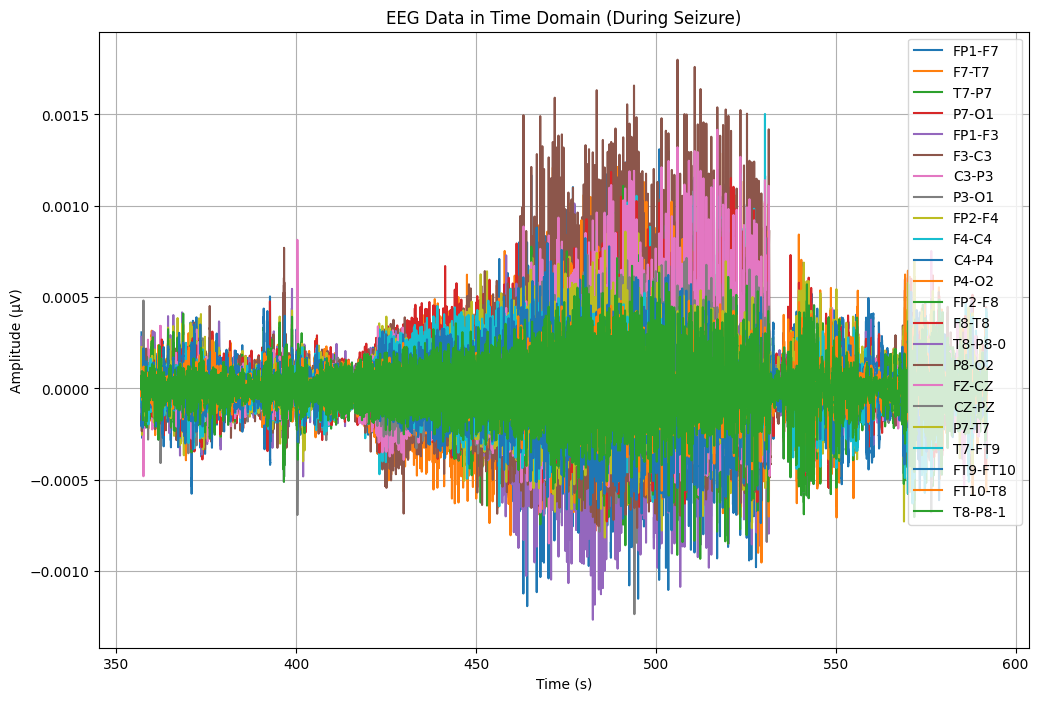

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Menentukan saluran EEG yang akan ditampilkan
channels = ['FP1-F7', 'F7-T7', 'T7-P7', 'P7-O1', 'FP1-F3', 'F3-C3',
           'C3-P3', 'P3-O1', 'FP2-F4', 'F4-C4', 'C4-P4', 'P4-O2', 'FP2-F8', 'F8-T8',
           'T8-P8-0', 'P8-O2', 'FZ-CZ', 'CZ-PZ', 'P7-T7', 'T7-FT9', 'FT9-FT10', 'FT10-T8', 'T8-P8-1']

# Mengambil data waktu dari kolom 'Time'
time = df1['Time']

# Membuat plot
plt.figure(figsize=(12, 8))

# Looping untuk menampilkan masing-masing saluran EEG yang dipilih
for channel in channels:
    if channel in df1.columns:  # Memastikan saluran ada dalam data
        plt.plot(time, df1[channel], label=channel)

# Menambahkan judul dan label
plt.title('EEG Data in Time Domain (During Seizure)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (µV)')
plt.legend(loc='upper right')

# Menampilkan grid dan plot
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Baca file CSV
df1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv")

# Threshold variansi untuk deteksi kejang
threshold_variance = 8.6878227848858e-09

# Hitung variansi untuk tiap channel (kolom) kecuali 'Time'
variance_per_channel = df1.drop(columns=['Time']).var()

# Deteksi channel yang melebihi threshold
seizure_channels = variance_per_channel[variance_per_channel > threshold_variance]

# Menampilkan channel yang mengalami kejang
print("Channel yang mengalami kejang:")
print(seizure_channels)

# Deteksi periode waktu kejang
def detect_seizure_periods(df, seizure_channels, threshold):
    seizure_periods = {}

    for channel in seizure_channels.index:
        # Mask untuk mendeteksi saat variansi channel melebihi threshold
        seizure_mask = (df[channel].abs() > threshold)
        seizure_times = df['Time'][seizure_mask]

        if not seizure_times.empty:
            # Waktu mulai dan berhenti kejang
            seizure_periods[channel] = {
                'start': seizure_times.iloc[0],
                'end': seizure_times.iloc[-1]
            }

    return seizure_periods

# Penggunaan fungsi untuk mendeteksi periode kejang
seizure_periods = detect_seizure_periods(df1, seizure_channels, threshold_variance)

# Tampilkan hasil periode kejang
for channel, period in seizure_periods.items():
    print(f"Channel: {channel}, Start: {period['start']}, End: {period['end']}")


Channel yang mengalami kejang:
F3-C3    1.073278e-08
dtype: float64
Channel: F3-C3, Start: 0.0, End: 3599.99609375


In [ ]:
import numpy as np

# Misalnya data EEG ada di dalam variabel eeg_data
mean_signal = np.mean(file1)
std_signal = np.std(file1)

# Threshold 3 standar deviasi di atas rata-rata
threshold = mean_signal + 3 * std_signal

# Deteksi kejang jika ada nilai di atas threshold
seizure_events = file1[file1 > threshold]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [ ]:
import pandas as pd

# Baca data CSV
df1 = pd.read_csv("/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv")

# Threshold variansi untuk deteksi kejang
threshold_variance = 8.6878227848858e-09

# Variansi tiap channel yang telah dihitung sebelumnya
variance_per_channel = pd.Series({
    'FP1-F7': 6.148562e-09, 'F7-T7': 8.194235e-09, 'T7-P7': 3.446619e-09, 'P7-O1': 4.835877e-09,
    'FP1-F3': 6.493762e-09, 'F3-C3': 1.073278e-08, 'C3-P3': 3.766383e-09, 'P3-O1': 5.600042e-09,
    'FP2-F4': 4.299823e-09, 'F4-C4': 4.754248e-09, 'C4-P4': 2.840702e-09, 'P4-O2': 3.090406e-09,
    'FP2-F8': 3.735452e-09, 'F8-T8': 4.498393e-09, 'T8-P8-0': 3.098089e-09, 'P8-O2': 2.829460e-09,
    'FZ-CZ': 5.757470e-09, 'CZ-PZ': 2.624451e-09, 'P7-T7': 3.446619e-09, 'T7-FT9': 3.280444e-09,
    'FT9-FT10': 6.438355e-09, 'FT10-T8': 1.769800e-09
})

# Deteksi channel yang melebihi threshold
seizure_channels = variance_per_channel[variance_per_channel > threshold_variance]

# Tampilkan channel yang mengalami kejang
print("Channel yang mengalami kejang berdasarkan variansi:")
print(seizure_channels)

# Deteksi periode waktu kejang untuk setiap channel
def detect_seizure_periods(df, seizure_channels, threshold):
    seizure_periods = {}

    for channel in seizure_channels.index:
        # Mask untuk mendeteksi saat channel melebihi threshold
        seizure_mask = (df[channel].abs() > threshold)
        seizure_times = df['Time'][seizure_mask]

        if not seizure_times.empty:
            # Waktu mulai dan berhenti kejang
            seizure_periods[channel] = {
                'start_time': seizure_times.iloc[0],
                'end_time': seizure_times.iloc[-1]
            }

    return seizure_periods

# Mendeteksi periode kejang
seizure_periods = detect_seizure_periods(df1, seizure_channels, threshold_variance)

# Tampilkan hasil periode kejang
for channel, period in seizure_periods.items():
    print(f"Channel: {channel}, Start Time: {period['start_time']}, End Time: {period['end_time']}")


In [ ]:
import pandas as pd
import numpy as np

# Memuat data
data = pd.read_csv('/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv')  # Ubah nama file sesuai lokasi data

# Menentukan channel yang akan dianalisis
channels = data.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'

# Menghitung variansi dari setiap channel untuk deteksi kejang
variances = data[channels].var(axis=0)

# Tampilkan variansi untuk setiap channel
print("Variansi tiap channel:")
print(variances)

# Tentukan threshold sebagai nilai rata-rata variansi + n standar deviasi (misalnya 2 std deviasi)
threshold_variance = np.mean(variances) + 2 * np.std(variances)

print(f"Threshold variansi untuk deteksi kejang: {threshold_variance}")

# Mendeteksi kejang berdasarkan threshold variansi
def detect_seizure(row, threshold):
    # Hitung variansi sinyal di tiap jendela waktu
    var = row[channels].var()
    if var > threshold:
        return 'kejang'
    else:
        return 'tidak kejang'

# Terapkan deteksi kejang pada data
data['prediksi_kejang'] = data.apply(lambda row: detect_seizure(row, threshold_variance), axis=1)

# Lihat hasil deteksi kejang
print(data[['Time']])


In [ ]:
import pandas as pd
import numpy as np

# Memuat data EEG (ubah dengan nama file yang sesuai)
data = pd.read_csv('/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv')  # Sesuaikan dengan lokasi file

# Menentukan channel yang akan dianalisis
channels = data.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'

# Threshold variansi
threshold_variance = 8.6878227848858e-09

# Menghitung variansi pada setiap baris (setiap titik waktu)
data['variance'] = data[channels].var(axis=1)

# Mendeteksi apakah kejang terjadi (variansi > threshold)
data['kejang'] = data['variance'] > threshold_variance

# Menemukan waktu mulai dan berakhirnya kejang
seizure_periods = []
in_seizure = False
start_time = None

for i, row in data.iterrows():
    if row['kejang'] and not in_seizure:
        # Kejang mulai
        start_time = row['Time']
        in_seizure = True
    elif not row['kejang'] and in_seizure:
        # Kejang berakhir
        end_time = row['Time']
        seizure_periods.append((start_time, end_time))
        in_seizure = False

# Jika kejang berlanjut sampai akhir data
if in_seizure:
    seizure_periods.append((start_time, data.iloc[-1]['Time']))

# Tampilkan hasil deteksi kejang
if seizure_periods:
    print("Periode kejang yang terdeteksi (waktu mulai - waktu selesai):")
    for start, end in seizure_periods:
        print(f"Mulai: {start}, Selesai: {end}")
else:
    print("Tidak ada kejang yang terdeteksi berdasarkan threshold variansi.")


In [ ]:
import pandas as pd

# Data variansi tiap channel (contoh variansi yang Anda berikan di atas)
data_variance = pd.Series({
    'FP1-F7': 6.148562e-09, 'F7-T7': 8.194235e-09, 'T7-P7': 3.446619e-09, 'P7-O1': 4.835877e-09,
    'FP1-F3': 6.493762e-09, 'F3-C3': 1.073278e-08, 'C3-P3': 3.766383e-09, 'P3-O1': 5.600042e-09,
    'FP2-F4': 4.299823e-09, 'F4-C4': 4.754248e-09, 'C4-P4': 2.840702e-09, 'P4-O2': 3.090406e-09,
    'FP2-F8': 3.735452e-09, 'F8-T8': 4.498393e-09, 'T8-P8-0': 3.098089e-09, 'P8-O2': 2.829460e-09,
    'FZ-CZ': 5.757470e-09, 'CZ-PZ': 2.624451e-09, 'P7-T7': 3.446619e-09, 'T7-FT9': 3.280444e-09,
    'FT9-FT10': 6.438355e-09, 'FT10-T8': 1.769800e-09
})

# Threshold variansi untuk deteksi kejang
threshold_variance = 8.6878227848858e-09

# Deteksi channel yang variansinya melebihi threshold
seizure_channels = data_variance[data_variance > threshold_variance]

# Menampilkan hasil
print("Channel yang mengalami kejang:")
print(seizure_channels)

# Jika terdapat time series, kita bisa lakukan deteksi durasi kejang dengan contoh berikut (andaikan data time series):
# Misal `time_series_variance` adalah DataFrame dengan kolom 'time', dan tiap kolom lain adalah channel.
# time_series_variance = pd.DataFrame({...})

# Berikut contoh jika ada data time series variansi:
def detect_seizure_periods(time_series_variance, threshold):
    # Mask variansi di tiap channel yang melebihi threshold
    seizure_mask = time_series_variance > threshold
    seizure_periods = {}

    for channel in seizure_mask.columns:
        # Temukan waktu ketika kejang mulai dan berhenti
        seizure_times = seizure_mask[channel][seizure_mask[channel]].index
        if len(seizure_times) > 0:
            seizure_periods[channel] = {
                'start': seizure_times[0],
                'end': seizure_times[-1]
            }

    return seizure_periods

# Penggunaan fungsi
# seizure_periods = detect_seizure_periods(time_series_variance, threshold_variance)
# print(seizure_periods)


In [ ]:
import pandas as pd
import numpy as np

# Memuat data (sesuaikan dengan file Anda)
data = pd.read_csv('/content/drive/MyDrive/TA/CSV/convert_chb05_06.csv')  # Ganti dengan file CSV Anda

# Menentukan threshold variansi untuk deteksi kejang
threshold_variance = 8.6878227848858e-09

# Menentukan channel yang akan dianalisis
channels = data.columns[:-2]  # Semua kolom kecuali 'Time' dan 'seizure'

# Menghitung variansi pada setiap baris
data['variance'] = data[channels].var(axis=1)

# Mendeteksi kejang berdasarkan threshold variansi
data['kejang'] = data['variance'] > threshold_variance

# Temukan waktu mulai dan akhir kejang
seizure_periods = []
in_seizure = False
start_time = None

for i, row in data.iterrows():
    if row['kejang'] and not in_seizure:
        # Mulai kejang
        start_time = row['Time']
        in_seizure = True
    elif not row['kejang'] and in_seizure:
        # Akhir kejang
        end_time = row['Time']
        seizure_periods.append((start_time, end_time))
        in_seizure = False

# Jika kejang berlanjut hingga akhir data
if in_seizure:
    seizure_periods.append((start_time, data.iloc[-1]['Time']))

# Tampilkan hasil
print("Periode kejang (start_time - end_time):")
for start, end in seizure_periods:
    print(f"Mulai: {start}, Selesai: {end}")
